In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data

online_history = pd.read_pickle("../data/online_history_cleaned.pkl")

# preview the data

online_history.head(n = 3)

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,WHITE MOROCCAN METAL LANTERN
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom,CREAM CUPID HEARTS COAT HANGER


In [3]:
# check the size of the data


online_history.shape


(397925, 8)

In [4]:
# check how many orders, products and customers in the dataset

print("Number of unique customers:", len(online_history.CustomerID.unique()))
print("Number of unique invoices:", len(online_history.Invoice.unique()))
print("Number of unique products:", len(online_history.StockCode.unique()))


Number of unique customers: 4339
Number of unique invoices: 18536
Number of unique products: 3665


In [5]:
print("The most expensive product Price:", online_history.Price.max())
print("The average price of a Product:", round(online_history.Price.mean(), 2))
print("Total Number of Items sold:", online_history.Quantity.sum())

# Signs of outliers... Let's not go into this now. If interested,
# I will share a notebook with detailed explorative work.


The most expensive product Price: 8142.75
The average price of a Product: 3.12
Total Number of Items sold: 5181697


In [6]:
# hmm, looks like the data is corrupted , let's remove all examples where price and quantity is an outlier

online_history[online_history.Price == online_history.Price.max()]

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
169617,551697,POST,1,2011-05-03 13:46:00,8142.75,u16029,United Kingdom,POSTAGE


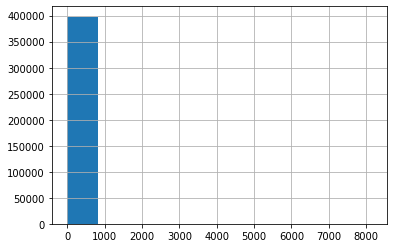

In [7]:
online_history.Price.hist();

In [8]:
def calc_outliers(var):
    Q3 = np.percentile(var, 75) 
    Q1 = np.percentile(var, 25)

    print("upper quartile:", Q3,  
        "\nlower quartile:", Q1)
  
    IQR = 1.5*(Q3 - Q1)

    LB = Q1 - IQR
    UB = Q3 + IQR

    print("Lower Bound of outliers:", round(LB, 2), "\nUpper Bound of outliers:", round(UB, 2)) 

    return LB, UB

In [9]:
LB, UB = calc_outliers(online_history.Price)


upper quartile: 3.75 
lower quartile: 1.25
Lower Bound of outliers: -2.5 
Upper Bound of outliers: 7.5


In [10]:
# remove all examples of outliers

print(online_history.shape)
online_history_cleaned = online_history[(online_history.Price > LB) & (online_history.Price < UB)]
print(online_history_cleaned.shape)


(397925, 8)
(362980, 8)


In [11]:
# check cleaning took place

online_history_cleaned.Price.describe()

count    362980.000000
mean          2.125971
std           1.520801
min           0.000000
25%           0.850000
50%           1.650000
75%           2.950000
max           7.460000
Name: Price, dtype: float64

In [12]:
# you could do the same for Quantity and other variables, but will save that for another iteration.

In [13]:
# check how many times postage appears

online_history_cleaned[online_history_cleaned.Description == "POSTAGE"]


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
127662,547444,POST,1,2011-03-23 10:55:00,1.00,u12811,Portugal,POSTAGE
149458,549689,POST,1,2011-04-11 13:40:00,4.95,u15971,United Kingdom,POSTAGE
169354,551652,POST,2,2011-05-03 12:03:00,1.00,u12643,France,POSTAGE
201887,554924,POST,1,2011-05-27 12:54:00,4.00,u12748,United Kingdom,POSTAGE
219648,556519,POST,1,2011-06-13 10:54:00,2.02,u16794,United Kingdom,POSTAGE
270654,561057,POST,1,2011-07-24 13:18:00,2.90,u17935,United Kingdom,POSTAGE
281010,562047,POST,1,2011-08-02 10:38:00,4.95,u17788,United Kingdom,POSTAGE
354491,568398,POST,1,2011-09-27 10:26:00,5.00,u14543,United Kingdom,POSTAGE
361821,569033,POST,1,2011-09-30 10:40:00,6.00,u15611,United Kingdom,POSTAGE
383600,570681,POST,1,2011-10-11 15:45:00,6.00,u12381,Norway,POSTAGE


In [14]:
# remove postage from the data

print(online_history_cleaned.shape)
online_history_cleaned[online_history_cleaned.StockCode != "POST"]
print(online_history_cleaned.shape)

# there may be more redundant stock codes, but would need more exploring

(362980, 8)
(362980, 8)


In [15]:
# top 50 products 

online_history_cleaned.Description.value_counts().nlargest(50)

CREAM HANGING HEART T-LIGHT HOLDER     2035
JUMBO BAG RED RETROSPOT                1618
ASSORTED COLOUR BIRD ORNAMENT          1408
PARTY BUNTING                          1394
LUNCH BAG RED RETROSPOT                1317
Unknown Stock                          1280
SET OF 3 CAKE TINS PANTRY DESIGN       1151
LUNCH BAG  BLACK SKULL.                1105
JUMBO BAG VINTAGE DOILEY               1098
LUNCH BAG SUKI DESIGN                  1083
PACK OF 72 RETROSPOT CAKE CASES        1068
POPCORN HOLDER                         1068
LUNCH BAG VINTAGE DOILEY               1029
BUNTING , SPOTTY                       1024
PAPER CHAIN KIT 50'S CHRISTMAS         1019
LUNCH BAG SPACEBOY DESIGN              1008
LUNCH BAG CARS BLUE                     989
HEART OF WICKER SMALL                   985
NATURAL SLATE HEART CHALKBOARD          980
LUNCH BAG PINK POLKADOT                 957
REX CASH+CARRY JUMBO SHOPPER            952
ALARM CLOCK BAKELIKE RED                899
LUNCH BAG APPLE DESIGN          

In [16]:
print(online_history_cleaned.shape)
online_history_cleaned = online_history_cleaned[~online_history_cleaned.Description.isin(["POST", "Unknown Stock"])]
print(online_history_cleaned.shape)

(362980, 8)
(361700, 8)


In [17]:
# look at the different target markets 
# let's assume different target markets behave differently and have different types of customers

online_history.Country.value_counts()


United Kingdom          354345
Germany                   9042
France                    8343
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

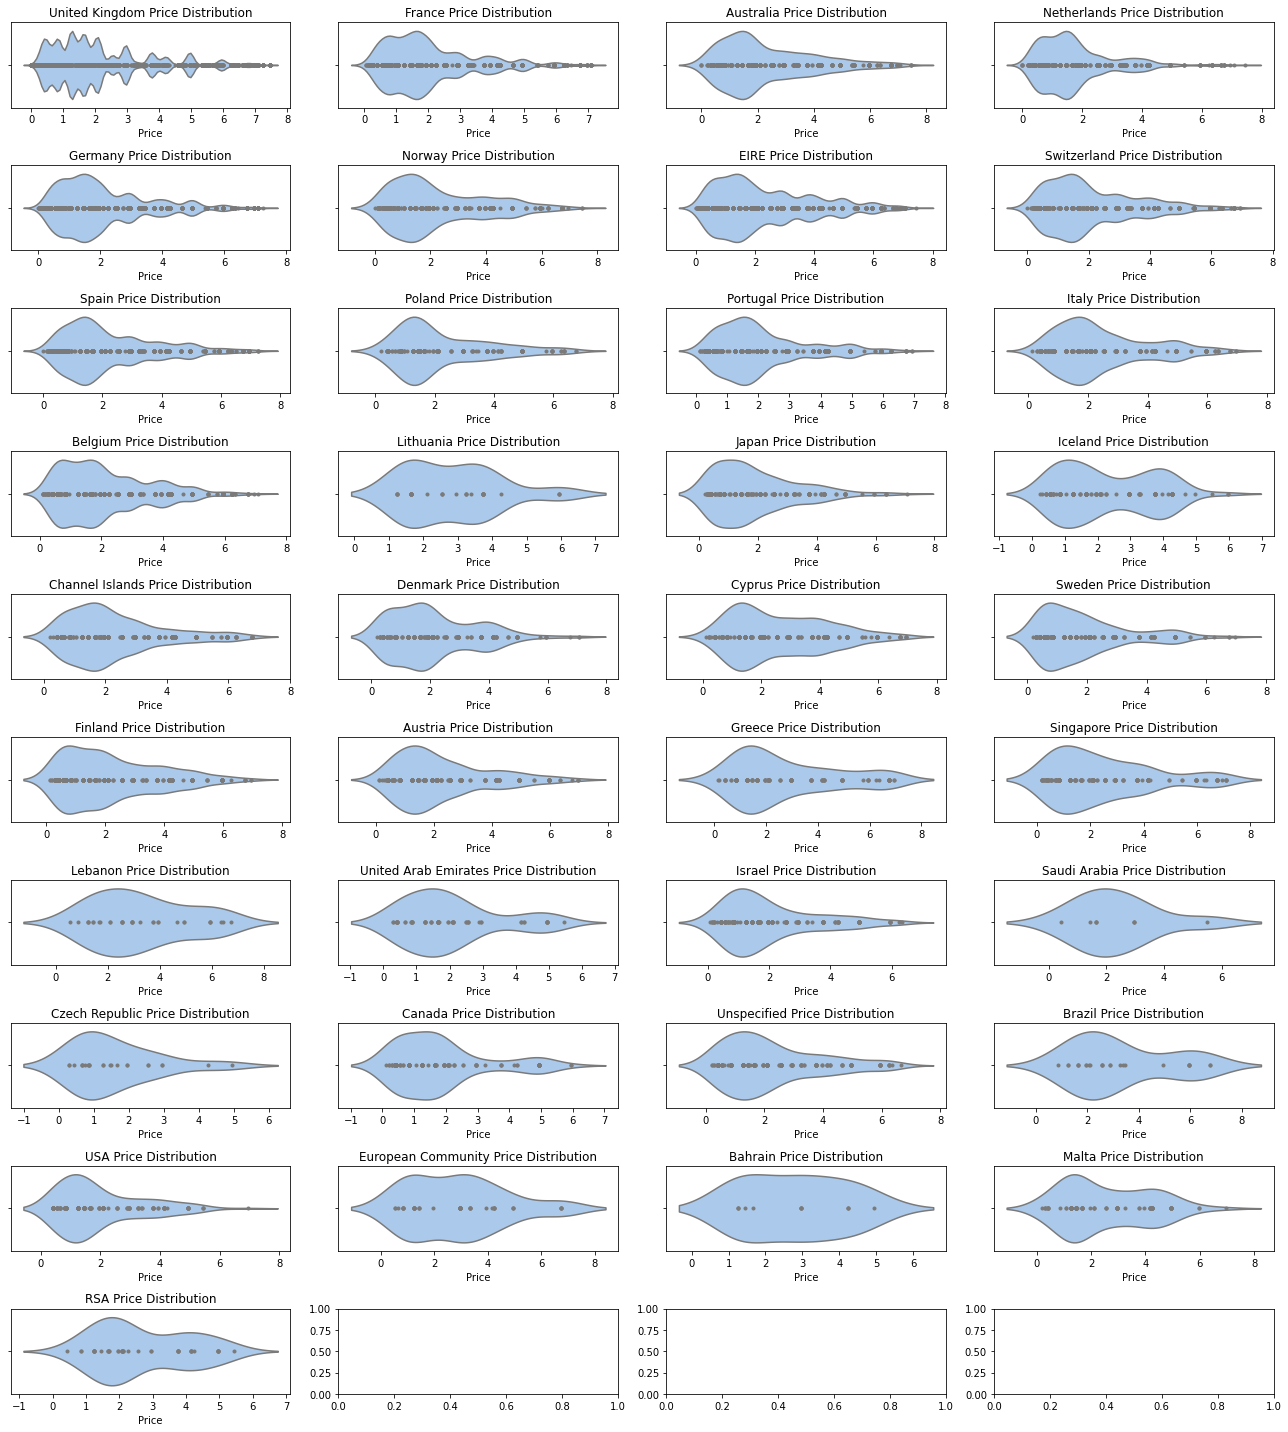

In [18]:
# can validate my assumption by for e.g. looking at the price distribution across target markets
# you could look at different products bought across different markets
# You could also look at Quantity distribution


countries = online_history_cleaned["Country"].unique() # extracting unique country names

# plotting the violin plot for the data
fig, ax = plt.subplots(10, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = online_history_cleaned[online_history_cleaned["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

    
# UK and France seem to have similar distributions, so maybe my assumption is not true but let's start with it...


In [19]:
# look at a market of our choicem let's start with the largest market

UK_online_history = online_history_cleaned[online_history_cleaned.Country == 'United Kingdom']

UK_online_history.head()

# check the Country column

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,WHITE MOROCCAN METAL LANTERN
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


In [20]:
UK_online_history.Country.value_counts()

United Kingdom    323471
Name: Country, dtype: int64

In [21]:
# check the size of our new data set

print("Number of unique customers:", len(UK_online_history.CustomerID.unique()))
print("Number of unique invoices:", len(UK_online_history.Invoice.unique()))
print("Number of unique products:", len(UK_online_history.StockCode.unique()))




Number of unique customers: 3891
Number of unique invoices: 16315
Number of unique products: 3365


In [22]:
# we want to aggregate this data, so we have customer level data
# start with calculating the recency, frequency and monteray value for every customer


In [23]:
# before we do that, we need a new variable - total amount, this is based on price * quantity

UK_online_history["TotalAmount"] = UK_online_history["Quantity"]*UK_online_history["Price"]

<ipython-input-23-aac399f33245>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_online_history["TotalAmount"] = UK_online_history["Quantity"]*UK_online_history["Price"]


In [24]:
# check that worked

UK_online_history.sample(5)

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,TotalAmount
523449,581125,22545,11,2011-12-07 12:41:00,0.19,u14087,United Kingdom,MINI JIGSAW BUNNIES,2.09
320483,565649,23249,3,2011-09-05 16:27:00,1.65,u16712,United Kingdom,ENAMEL DINNER PLATE PANTRY,4.95
123221,547062,22362,1,2011-03-20 13:28:00,2.95,u16728,United Kingdom,GLASS JAR PEACOCK BATH SALTS,2.95
506144,579885,84882,2,2011-11-30 17:37:00,3.75,u15444,United Kingdom,GREEN WIRE STANDING CANDLE HOLDER,7.50
150956,549901,22693,24,2011-04-12 16:17:00,1.25,u1718,United Kingdom,GROW A FLYTRAP OR SUNFLOWER IN TIN,30.00


In [25]:
#  Distribution of how many times the customer purchased - this is defined by how many invoices a customer has had

UK_online_history.groupby(['CustomerID']).nunique()['Invoice'].sort_values(ascending = False)

CustomerID
u12748    202
u17841    122
u15311     91
u14606     90
u13089     89
         ... 
u15523      1
u1552       1
u15517      1
u15507      1
u15562      1
Name: Invoice, Length: 3891, dtype: int64

In [26]:
# check that worked

print("# of invoices for customer ID u12748:", len(UK_online_history[UK_online_history.CustomerID == 'u12748'].Invoice.unique()))

# of invoices for customer ID u12748: 202


In [28]:
# save this as a dataframe

customer_frequency = pd.DataFrame(UK_online_history.groupby(['CustomerID']).nunique()['Invoice']).rename(columns = {"Invoice": "Frequency"})


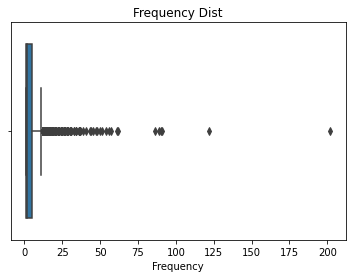

In [29]:
# check the distribution of our new feature
sns.boxplot(x = customer_frequency.Frequency)
plt.title("Frequency Dist");

In [30]:
# Distribution of how much the customer spent - this is defined by the sum of total_amount

UK_online_history.groupby(['CustomerID']).sum()["TotalAmount"].sort_values(ascending = False)

CustomerID
u18102    221190.81
u1745     180900.65
u16446    168472.50
u17511     85922.00
u12346     77183.60
            ...    
u14792         6.20
u16454         5.90
u16429         4.95
u14795         4.25
u13256         0.00
Name: TotalAmount, Length: 3891, dtype: float64

In [31]:
# check the output

print("# of invoices for customer ID u18102:", round(UK_online_history[UK_online_history.CustomerID == 'u18102']['TotalAmount'].sum(), 2))

# of invoices for customer ID u18102: 221190.81


In [32]:
# let's save this as a dataframe

customer_monetary = pd.DataFrame(UK_online_history.groupby(['CustomerID']).sum()["TotalAmount"].sort_values(ascending = False)).rename(columns = {"TotalAmount": "Monetary"})


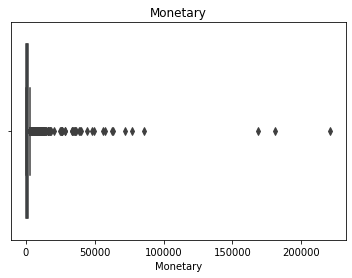

In [33]:
# check the distribution of our new feature
sns.boxplot(x = customer_monetary.Monetary)
plt.title("Monetary");


In [34]:
# Finally let's calculate the Recency of Orders

UK_online_history.groupby(['CustomerID']).max()["InvoiceDate"].sort_values(ascending = False)


CustomerID
u13113   2011-12-09 12:49:00
u15804   2011-12-09 12:31:00
u13777   2011-12-09 12:25:00
u17581   2011-12-09 12:21:00
u12748   2011-12-09 12:20:00
                 ...        
u14729   2010-12-01 12:43:00
u17968   2010-12-01 12:23:00
u16583   2010-12-01 12:03:00
u17908   2010-12-01 11:45:00
u18074   2010-12-01 09:53:00
Name: InvoiceDate, Length: 3891, dtype: datetime64[ns]

In [35]:
# check the date of a user is the same as table above

UK_online_history[UK_online_history.CustomerID == 'u13113']['InvoiceDate'].max()


Timestamp('2011-12-09 12:49:00')

In [36]:
# we calculate recency the difference between the max invoice date and the customer last invoice date
# usually you would use today's date

customer_recency = pd.DataFrame(UK_online_history.groupby(['CustomerID']).max()["InvoiceDate"]).rename(columns = {"InvoiceDate": "Last_Invoice_Date"})
customer_recency['Recency'] = (UK_online_history['InvoiceDate'].max() - customer_recency['Last_Invoice_Date']).astype('timedelta64[D]').astype(int)
customer_recency

,Last_Invoice_Date,Recency
CustomerID,,
u12346,2011-01-18 10:01:00,325
u12747,2011-12-07 14:34:00,1
u12748,2011-12-09 12:20:00,0
u12749,2011-12-06 09:56:00,3
u1282,2011-12-06 15:12:00,2
...,...,...
u1828,2011-03-07 09:52:00,277
u18281,2011-06-12 10:53:00,180
u18282,2011-12-02 11:43:00,7


In [37]:
# do a manual check, does the recency make sense? 
# drop last invoice date

customer_recency.drop(['Last_Invoice_Date'], axis = 1, inplace = True)

In [38]:
# Aggregate all the tables together

online_customer_rfm = pd.concat([customer_frequency, customer_monetary, customer_recency], axis=1)
online_customer_rfm

,Frequency,Monetary,Recency
CustomerID,,,
u12346,1,77183.60,325
u12747,11,3763.01,1
u12748,202,28308.44,0
u12749,5,2720.63,3
u1282,4,942.34,2
...,...,...,...
u1828,1,137.00,277
u18281,1,46.92,180
u18282,2,127.05,7


In [39]:
online_customer_rfm.to_pickle("../data/UK_customers_rfm.pkl")